#Workflow<br>
![alt text](https://adilashkare.files.wordpress.com/2018/04/titanic_sinking.jpg?w=700)
##1. Definição do Problema: 

O naufrágio Titanic é um dos mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia sensacional chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: "que tipo de pessoas têm mais probabilidade de sobreviver?" usando dados de passageiros (nome, idade, sexo, classe socioeconômica etc.)

Skills necessárias:
* Classificação binária
* Noções básicas de Python/R



##2. Aquisição de dados: 

Os dados foram divididos em dois grupos: conjunto de treinamento (train.csv) conjunto de teste (test.csv) O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "ground truth") para cada passageiro. Seu modelo será baseado em "features", como sexo e classe dos passageiros. Você também pode usar a engenharia de recursos(feature engineering) para criar novas features. O conjunto de teste deve ser usado para avaliar o desempenho do seu modelo em dados não vistos. Para o conjunto de testes, não fornecemos a variável target para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic.





In [1]:
# train: https://raw.githubusercontent.com/qodatecnologia/titanic-dataset/master/train.csv
# test: https://raw.githubusercontent.com/qodatecnologia/titanic-dataset/master/test.csv
import pandas as pd

df_train = pd.read_csv('https://raw.githubusercontent.com/qodatecnologia/titanic-dataset/master/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/qodatecnologia/titanic-dataset/master/test.csv')

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<b>PassengerId</b> unica coluna que não altera nosa coluna alvo "Survived".<br><br>
<b>Survived</b> variável target, valore que queremos prever (0 ou 1):<br>
1 = Survived<br>
0 = Not Survived<br><br>
<b>Pclass (Passenger Class)</b> classe socio-economica do passageiro, com 3 valores (1, 2 ou 3):<br>
1 = Classe Alta<br>
2 = Classe Média<br>
3 = Classe Baixa<br><br>
<b>"Name", "Sex" e "Age"</b> são auto-explicativas.<br><br>
<b>SibSp</b> é o número total de irmãos e cônjuges dos passageiros<br><br>
<b>Parch</b> é o número total de pais e filhos de passageiros<br><br>
<b>Ticket</b> é o número do bilhete do passageiro<br><br>
<b>Fare</b> tarifa do passageiro<br><br>
<b>Cabin</b> número da cabine do passageiro<br><br>
<b>Embarked</b> porto de embarque do passageiro, variável categórica que possui 3 valores únicos (C, Q ou S):<br>
C = Cherbourg<br>
Q = Queenstown<br>
S = Southampton<br>

In [2]:
# Bibliotecas
import pandas as pd 
import matplotlib 
import numpy as np 
import scipy as sp 
import IPython
from IPython import display 
import sklearn 
import random
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Modelos preditivos
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
# Auxiliares
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# DataViz
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Dataviz Config
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

3. Preparar dados: utilizaremos os 4 C´s da limpeza de dados: Corrigir, completar, criar e converter.

In [4]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/qodatecnologia/titanic-dataset/master/train.csv')
data_val  = pd.read_csv('https://raw.githubusercontent.com/qodatecnologia/titanic-dataset/master/test.csv')

# criamos copia destes dados
data1 = data_raw.copy(deep = True)
# e concatenamos os datasets para altera-los juntos, caso necessário
data_cleaner = [data1, data_val]

In [5]:
print('Null values TREINO:\n', data1.isnull().sum())
print()
print('Null values TESTE:\n', data_val.isnull().sum())

Null values TREINO:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values TESTE:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# LIMPEZA DE DADOS
for dataset in data_cleaner:    
    #MEDIANA
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #MODA (em caso de uso da mediana, erro de tipo: str)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #MEDIANA
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
# dropar colunas para dataset de treino
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [7]:
# FEATURE ENGINEERING: criação de features
for dataset in data_cleaner:    
    # nova feature: FamilySize
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    
    #nova feature: IsAlone
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    # nova feature: "Title"
    # Divisão rápida para "Name" com método .split()
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    # nova feature: FareBin, "cortamos os dados em 4(quartil)"; Segmentamos/classificamos em 4 grupos
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #nova feature: AgeBin para melhor distribuir os dados de idade por grupos, neste caso, 5. Segmentamos/classificamos em 5 grupos
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

data1.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
143,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,6.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
466,0,2,"Campbell, Mr. William",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
704,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
331,0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"
547,1,2,"Padro y Manent, Mr. Julian",male,28.0,0,0,13.8625,C,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
861,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,11.5000,S,2,0,Mr,"(7.91, 14.454]","(16.0, 32.0]"
591,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,78.2667,C,2,0,Mrs,"(31.0, 512.329]","(48.0, 64.0]"
700,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,227.5250,C,2,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"
291,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,91.0792,C,2,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"
540,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,71.0000,S,3,0,Miss,"(31.0, 512.329]","(32.0, 48.0]"


In [8]:
# Limpar Title names raros(diferentes de Mr, Miss, Mrs, Master)
print(data1['Title'].value_counts())
title_names = (data1['Title'].value_counts() < 10) # Série de true/false do TitleName como index, quando aparece menos que 10x no dataset

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Lady              1
Jonkheer          1
Don               1
Capt              1
Mme               1
the Countess      1
Ms                1
Name: Title, dtype: int64


In [9]:
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Mlle             True
Major            True
Sir              True
Lady             True
Jonkheer         True
Don              True
Capt             True
Mme              True
the Countess     True
Ms               True
Name: Title, dtype: bool

In [10]:
# Função lambda para economizar linhas de código e substituir por "Misc" qualquer TitleName raro, com menos de 10 aparições
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [11]:
# Visualizar limpeza
data1.info()
print("====================================================================================")
data_val.info()
print("====================================================================================")
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
530,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26.0000,S,3,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
794,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
120,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,73.5000,S,3,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
669,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,28.0,1,0,52.0000,S,2,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"
81,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,9.5000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
536,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,26.5500,S,1,1,Misc,"(14.454, 31.0]","(32.0, 48.0]"
689,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,211.3375,S,2,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]"
37,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
854,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
567,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,5,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"


In [12]:
# Converter

label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [13]:
# Definir variavel target
Target = ['Survived']

In [14]:
# Definir features ja alteradas
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] # Nomes para gráficos
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] # modelos preditivos
data1_xy =  Target + data1_x
data1_xy

['Survived',
 'Sex',
 'Pclass',
 'Embarked',
 'Title',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone']

In [15]:
# Variáveis a substituir, com LabelEncoder
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
data1_xy_bin

['Survived',
 'Sex_Code',
 'Pclass',
 'Embarked_Code',
 'Title_Code',
 'FamilySize',
 'AgeBin_Code',
 'FareBin_Code']

In [16]:
# Variáveis dummy
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [17]:
# Divisão TREINO/TESTE

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Dataset: {}".format(data1.shape))
print("Treino: {}".format(train1_x.shape))
print("Teste: {}".format(test1_x.shape))

train1_x_bin.head()

Dataset: (891, 19)
Treino: (668, 8)
Teste: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


##3. Análise exploratória: estatística e dataviz!

In [18]:
data1_x

['Sex',
 'Pclass',
 'Embarked',
 'Title',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone']

In [19]:
# Correlação por sobrevivência
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Correlação sobrevivência:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Correlação sobrevivência: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Correlação sobrevivência: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Correlação sobrevivência: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Correlação sobrevivência: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Correlação sobrevivência: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Correlação sobrevivência: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Correlação sobrevivência: FamilySize
   FamilySize  Survived
0           1  0.30

In [20]:
data1[[x, Target[0]]]

,IsAlone,Survived
0,0,0
1,0,1
2,1,1
3,0,1
4,1,0
...,...,...
886,1,0
887,1,1
888,0,0
889,1,1


In [21]:
data1[[x, Target[0]]].groupby(x, as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


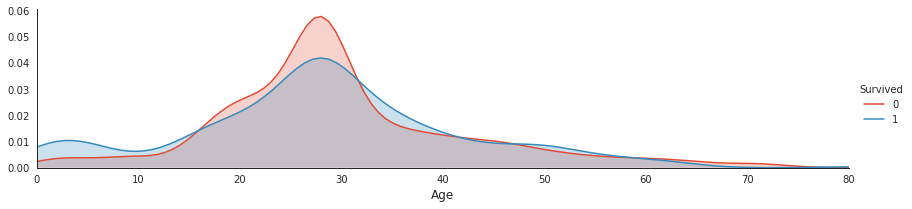

In [22]:
# Distribuição por idade: sobreviventes/não-sobreviventes
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

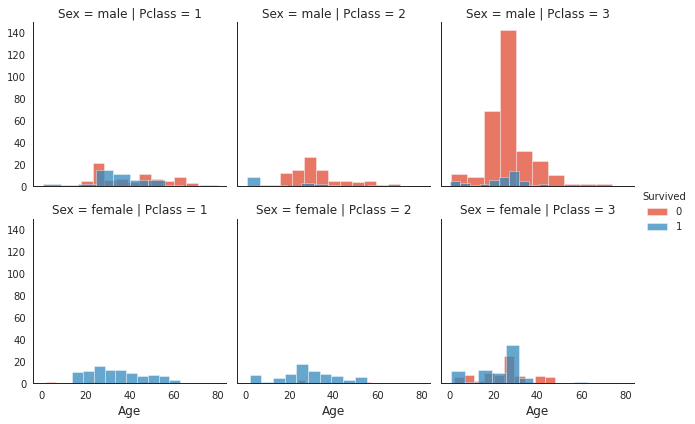

In [23]:
# Comparativo Sexo/Classe/Idade
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

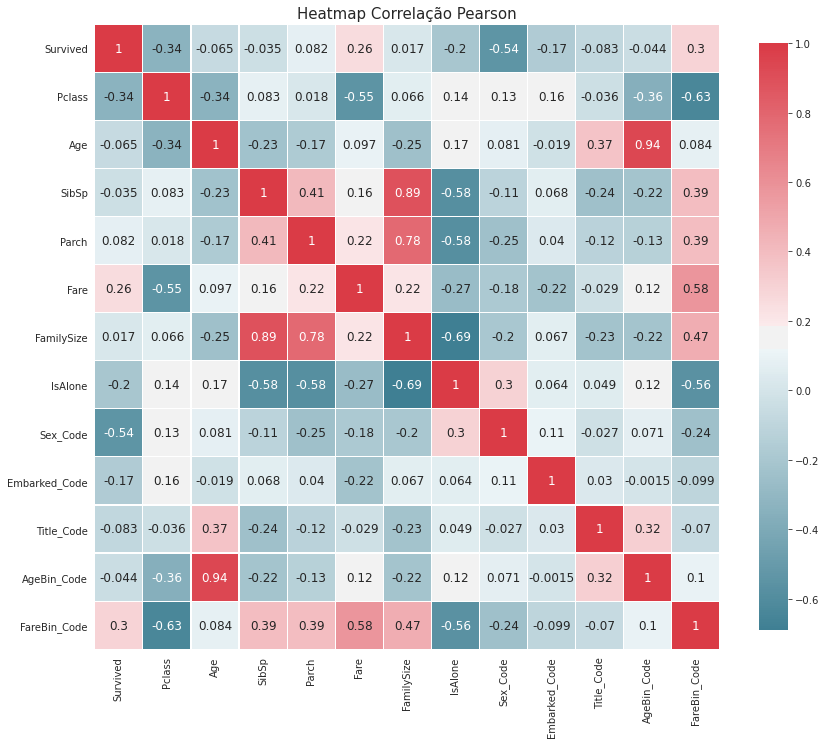

In [24]:
# Heatmap de Correlação
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Heatmap Correlação Pearson', y=1.05, size=15)

correlation_heatmap(data1)

## 4. Modelo preditivo
![texto alternativo](https://scikit-learn.org/stable/_static/ml_map.png)



In [25]:
# Instanciar diversos algoritmos de CLASSIFICAÇÃO
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [26]:
# splitter http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 

# comparar métricas
MLA_columns = ['MLA Nome', 'MLA Parametros','Acurácia média TREINO', 'Acurácia média TESTE', 'TEMPO UTILIZADO(média)']
MLA_compare = pd.DataFrame(columns = MLA_columns)

# comparar predições
MLA_predict = data1[Target]

# salvamos performance na tabela
row_index = 0

In [27]:
for alg in MLA:

    # setamos nome do algoritmo e parametros
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Nome'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parametros'] = str(alg.get_params())
    
    # resultados com cross validation
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'TEMPO UTILIZADO(média)'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Acurácia média TREINO'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Acurácia média TESTE'] = cv_results['test_score'].mean()     

    # salvamos as predições, algoritmo por algoritmo
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

In [28]:
MLA_compare.sort_values(by = ['Acurácia média TESTE'], ascending = False, inplace = True)
MLA_compare

,MLA Nome,MLA Parametros,Acurácia média TREINO,Acurácia média TESTE,TEMPO UTILIZADO(média)
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.827985,0.254412
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.0423389
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890449,0.826493,0.0773955
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834082,0.826119,0.0488072
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.823507,0.1794
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.890824,0.822761,0.0333543
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866667,0.822761,0.149409
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.822388,0.00505188
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.814925,0.00480182
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.00737171


In [29]:
MLA_predict

,Survived,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,...,GaussianNB,KNeighborsClassifier,SVC,NuSVC,LinearSVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,1,1,1,...,1,0,1,1,1,0,0,1,1,0
3,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
887,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
888,0,0,0,0,0,0,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
889,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


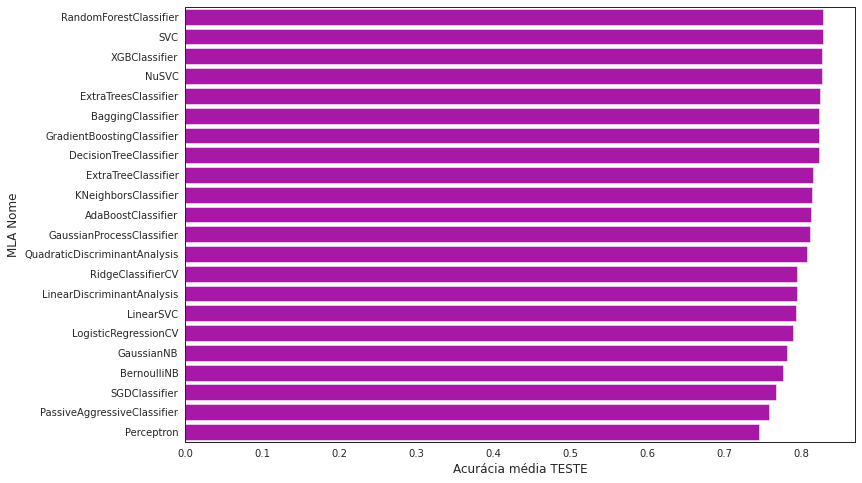

In [30]:
#barplot seaborn https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='Acurácia média TESTE', y = 'MLA Nome', data = MLA_compare, color = 'm')

Text(0, 0.5, 'Algoritmo')

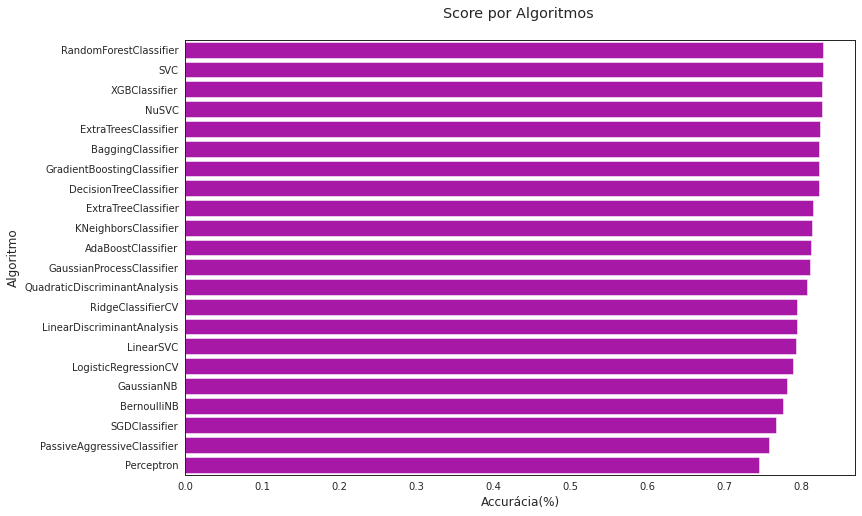

In [31]:
#barplot seaborn https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='Acurácia média TESTE', y = 'MLA Nome', data = MLA_compare, color = 'm')

# pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Score por Algoritmos \n')
plt.xlabel('Accurácia(%)')
plt.ylabel('Algoritmo')

##5. Validar e implementar modelo preditivo

In [32]:
submit_xgb = XGBClassifier()
submit_xgb.fit(data1[data1_x_bin], data1[Target])
data_val['Survived'] = submit_xgb.predict(data_val[data1_x_bin])

In [33]:
#submit file
submit = data_val[['PassengerId','Survived']]
submit.to_csv("submit.csv", index=False)